# Forecasting Hypoxia in Temperate Lakes using Ensemble Machine Learning Methods

Can ensemble machine learning methods such as random forest,
AdaBoost, or gradient boosting accurately predict seasonal hypoxia using deoxygenation concentrations
across temperate lakes?

**AI Disclosure Statement**
I did not use AI.

### Imports

In [ ]:
import gdown
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import plotly.express as px
import plotly.graph_objects as go

# Epilimnion (Surface Level) Table Creation and Visualizations

## Epilimnion Statistics Data (Surface Level Dissolved Oxygen)

In [ ]:
df_epi = pd.read_csv('/content/Epilimnion_Derived_Stats.csv')
df_epi

,RowID,lake_id,name,year,mean_sum_DO,mean_sum_temp,mean_Sum_Per_Sat
0,1,1,Washington,1993,9.61,20.46,106.861
1,2,1,Washington,1994,9.01,23.16,105.562
2,3,1,Washington,1995,9.18,21.38,103.935
3,4,1,Washington,1996,9.14,20.75,102.284
4,5,1,Washington,1997,8.96,23.23,105.005
...,...,...,...,...,...,...,...
10214,10310,442,Nkuruba,2007,3.89,22.74,NaN
10215,10311,442,Nkuruba,2008,4.59,23.05,NaN
10216,10312,442,Nkuruba,2009,4.35,23.43,NaN
10217,10313,442,Nkuruba,2010,5.23,23.66,NaN


In [ ]:
df_epi['name'].unique()

array(['Washington', 'Sammamish', 'Mueggelsee', 'Erken',
       'Rimov Reservoir', 'Maggiore', 'Neversink Reservoir',
       'Cannonsville Reservoir', 'ELA Lake 224', 'ELA Lake 239',
       'ELA Lake 373', 'Kezar Lake - Upper Bay', 'Kezar Lake - Lower Bay',
       'Cushman Pond', 'Heald Pond', 'Farrington Pond', 'Horseshoe Pond',
       'Bauneg Beg Lake', 'Sabbathday Lake', 'Lake Caldonazzo',
       'Lake Iseo', 'Jordan Pond', 'Allequash', 'Big Muskellunge',
       'Crystal Bog', 'Crystal Lake', 'Fish Lake', 'Lake Mendota',
       'Lake Monona', 'Sparkling', 'Trout Bog', 'Trout', 'Lake Wingra',
       'Bubble Pond', 'Eagle', 'Irvine', 'Brunner', 'Kortowskie',
       'Tarawera', 'Taupo', 'Blue Chalk', 'Chub', 'Crosson', 'Dickie',
       'Harp', 'Heney', 'Plastic', 'Red Chalk Main', 'Red Chalk East',
       'Annie', 'Big Moose', 'Brooktrout', 'Carry', 'Cascade',
       'Constable', 'Dart', 'G', 'Grass', 'Indian', 'Jockeybush',
       'Limekiln', 'Long', 'Moss', 'North', 'Rondaxe', 'Round

Rename lake_name to join to lake information dataframe

In [ ]:
df_epi.rename(columns = {'name':'lake_name'}, inplace= True)
df_epi

,RowID,lake_id,lake_name,year,mean_sum_DO,mean_sum_temp,mean_Sum_Per_Sat
0,1,1,Washington,1993,9.61,20.46,106.861
1,2,1,Washington,1994,9.01,23.16,105.562
2,3,1,Washington,1995,9.18,21.38,103.935
3,4,1,Washington,1996,9.14,20.75,102.284
4,5,1,Washington,1997,8.96,23.23,105.005
...,...,...,...,...,...,...,...
10214,10310,442,Nkuruba,2007,3.89,22.74,NaN
10215,10311,442,Nkuruba,2008,4.59,23.05,NaN
10216,10312,442,Nkuruba,2009,4.35,23.43,NaN
10217,10313,442,Nkuruba,2010,5.23,23.66,NaN


## Lakes Data

In [ ]:
df_lakes = pd.read_csv('/content/Lake_information.csv')
df_lakes

,lake_id,contributor,country,state_prov,lat,long,max_depth,surf_area,lake_name,chlor_a
0,1,28,USA,Washington,47.6215,-122.2558,65.00,8760.0,Washington,2.245139
1,2,28,USA,Washington,47.6085,-122.0878,32.00,1980.0,Sammamish,NaN
2,3,20,Germany,Berlin,52.4380,13.6500,8.00,730.0,Mueggelsee,50.199359
3,4,3,Sweden,Stockholm,59.8403,18.6258,20.65,24.2,Erken,NaN
4,5,23,Czech Republick,South Bohemian Region,48.8489,14.4912,42.00,180.0,Rimov Reservoir,21.907407
...,...,...,...,...,...,...,...,...,...,...
432,438,18,US,Missouri,38.5911,-92.8072,13.11,31.2,Manito,29.284559
433,439,18,US,Missouri,37.7297,-90.6347,7.32,86.6,Bismark/Carl Disalvo,45.417647
434,440,81,Russia,Moscow Region,55.5827,35.8585,22.00,3070.0,Mozhaysk reservoir,NaN
435,441,82,US,California,41.2275,-122.3836,34.00,19.0,Castle,1.665328


In [ ]:
df_lakes['lake_name'].unique()

array(['Washington', 'Sammamish', 'Mueggelsee', 'Erken',
       'Rimov Reservoir', 'Maggiore', 'Neversink Reservoir',
       'Cannonsville Reservoir', 'ELA Lake 114', 'ELA Lake 224',
       'ELA Lake 239', 'ELA Lake 373', 'ELA Lake 442',
       'Kezar Lake - Upper Bay', 'Kezar Lake - Lower Bay', 'Cushman Pond',
       'Heald Pond', 'Farrington Pond', 'Horseshoe Pond',
       'Bauneg Beg Lake', 'Sabbathday Lake', 'Lake Caldonazzo',
       'Lake Iseo', 'Jordan Pond', 'Allequash', 'Big Muskellunge',
       'Crystal Bog', 'Crystal Lake', 'Fish Lake', 'Lake Mendota',
       'Lake Monona', 'Sparkling', 'Trout Bog', 'Trout', 'Lake Wingra',
       'Bubble Pond', 'Eagle', 'Irvine', 'Brunner', 'Kortowskie',
       'Tarawera', 'Taupo', 'Blue Chalk', 'Chub', 'Crosson', 'Dickie',
       'Harp', 'Heney', 'Plastic', 'Red Chalk Main', 'Red Chalk East',
       'Annie', 'Big Moose', 'Brooktrout', 'Carry', 'Cascade',
       'Constable', 'Dart', 'G', 'Grass', 'Indian', 'Jockeybush',
       'Limekiln', 'Lo

## Join Epilimnion Data with Lakes Data by Lake_ID

In [ ]:
df_epi_lakes = pd.merge(df_epi, df_lakes, on = ['lake_id', 'lake_name'], how = 'inner')
df_epi_lakes = df_epi_lakes.dropna().reset_index(drop=True)
df_epi_lakes

,RowID,lake_id,lake_name,year,mean_sum_DO,mean_sum_temp,mean_Sum_Per_Sat,contributor,country,state_prov,lat,long,max_depth,surf_area,chlor_a
0,1,1,Washington,1993,9.61,20.46,106.861,28,USA,Washington,47.6215,-122.2558,65.0,8760.0,2.245139
1,2,1,Washington,1994,9.01,23.16,105.562,28,USA,Washington,47.6215,-122.2558,65.0,8760.0,2.245139
2,3,1,Washington,1995,9.18,21.38,103.935,28,USA,Washington,47.6215,-122.2558,65.0,8760.0,2.245139
3,4,1,Washington,1996,9.14,20.75,102.284,28,USA,Washington,47.6215,-122.2558,65.0,8760.0,2.245139
4,5,1,Washington,1997,8.96,23.23,105.005,28,USA,Washington,47.6215,-122.2558,65.0,8760.0,2.245139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3690,10291,441,Castle,2001,6.68,20.57,90.947,82,US,California,41.2275,-122.3836,34.0,19.0,1.665328
3691,10292,441,Castle,2002,6.54,21.26,90.135,82,US,California,41.2275,-122.3836,34.0,19.0,1.665328
3692,10293,441,Castle,2009,7.32,21.09,100.467,82,US,California,41.2275,-122.3836,34.0,19.0,1.665328
3693,10294,441,Castle,2010,8.31,20.67,113.270,82,US,California,41.2275,-122.3836,34.0,19.0,1.665328


In [ ]:
df_epi_lakes.columns

Index(['RowID', 'lake_id', 'lake_name', 'year', 'mean_sum_DO', 'mean_sum_temp',
       'mean_Sum_Per_Sat', 'contributor', 'country', 'state_prov', 'lat',
       'long', 'max_depth', 'surf_area', 'chlor_a'],
      dtype='object')

## Preliminary Data Visualizations for Epilimnion (Surface Level) Dissolved Oxygen Concentrations

In [ ]:
fig = px.box(df_epi_lakes, x = 'lake_name', y = 'mean_sum_DO')
fig.show()

In [ ]:
fig = px.histogram(df_epi_lakes, x = 'lake_name')
fig.show()

The lakes with sampling density above a count of 40 are Kortowskie, Moose Pond, Island Pond, North Pond, and Silver

In [ ]:
fig = px.scatter_matrix(df_epi_lakes)
fig.show()

In [ ]:
fig = px.scatter_matrix(df_epi_lakes[['mean_sum_DO', 'mean_Sum_Per_Sat', 'mean_sum_temp']])
fig.show()

There is **multicollinearity** between **mean_sum_DO** and **mean_Sum_Per_Sat**, both are measures of deoxigentation. One is in units of Miligrams/Liter of dissolved oxygen and the other is percent of saturation for dissolved oxygen. We will use mean DO in mg/Liter so we will drop the mean_sum_Per_Sat column. At this point I will also drop the RowID as it is an unique identifier and not a predictor that we want to assess.

In [ ]:
df_epi_lakes = df_epi_lakes.drop(columns = ['mean_Sum_Per_Sat', 'RowID'])
df_epi_lakes.columns

Index(['lake_id', 'lake_name', 'year', 'mean_sum_DO', 'mean_sum_temp',
       'contributor', 'country', 'state_prov', 'lat', 'long', 'max_depth',
       'surf_area', 'chlor_a'],
      dtype='object')

# Predictions for Epilimnion (Surface Level) Dissolved Oxygen

## 1. Split into test and training sets

We do not need to fix class imbalance since we are using regression to make predictions on **mean_sum_DO**. But we will need to encode the categorical columns such as **country** and **state/providence** and remove the **lake names** column since it is already encoded into **lake IDs**.

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['country', 'state_prov']
numerical_df = df_epi_lakes.drop(columns = ['country', 'state_prov', 'lake_name'])

categorical_cols_encoded = []
for i in categorical_cols:
  le = LabelEncoder()
  categorical_cols_encoded.append(pd.Series(le.fit_transform(df_epi_lakes[i]), name = i))

cat_encoded = pd.concat(categorical_cols_encoded, axis = 1)
epi_encoded_df = pd.concat([numerical_df, cat_encoded], axis=1)

epi_encoded_df


,lake_id,year,mean_sum_DO,mean_sum_temp,contributor,lat,long,max_depth,surf_area,chlor_a,country,state_prov
0,1,1993,9.61,20.46,28,47.6215,-122.2558,65.0,8760.0,2.245139,7,30
1,1,1994,9.01,23.16,28,47.6215,-122.2558,65.0,8760.0,2.245139,7,30
2,1,1995,9.18,21.38,28,47.6215,-122.2558,65.0,8760.0,2.245139,7,30
3,1,1996,9.14,20.75,28,47.6215,-122.2558,65.0,8760.0,2.245139,7,30
4,1,1997,8.96,23.23,28,47.6215,-122.2558,65.0,8760.0,2.245139,7,30
...,...,...,...,...,...,...,...,...,...,...,...,...
3690,441,2001,6.68,20.57,82,41.2275,-122.3836,34.0,19.0,1.665328,6,4
3691,441,2002,6.54,21.26,82,41.2275,-122.3836,34.0,19.0,1.665328,6,4
3692,441,2009,7.32,21.09,82,41.2275,-122.3836,34.0,19.0,1.665328,6,4
3693,441,2010,8.31,20.67,82,41.2275,-122.3836,34.0,19.0,1.665328,6,4


In [ ]:
X = epi_encoded_df.drop(columns = ['mean_sum_DO'])
y = epi_encoded_df['mean_sum_DO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (2956, 11)
Shape of X_test: (739, 11)
Shape of y_train: (2956,)
Shape of y_test: (739,)


## 2. Random Forest Regressor

In [ ]:
random_forest_model = RandomForestRegressor(random_state = 42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest - Root Mean Squared Error (RMSE):  {rmse_rf}")

Random Forest - Root Mean Squared Error (RMSE):  1.212126430774169


Feature importance for Epilimnion Random Forest Prediction

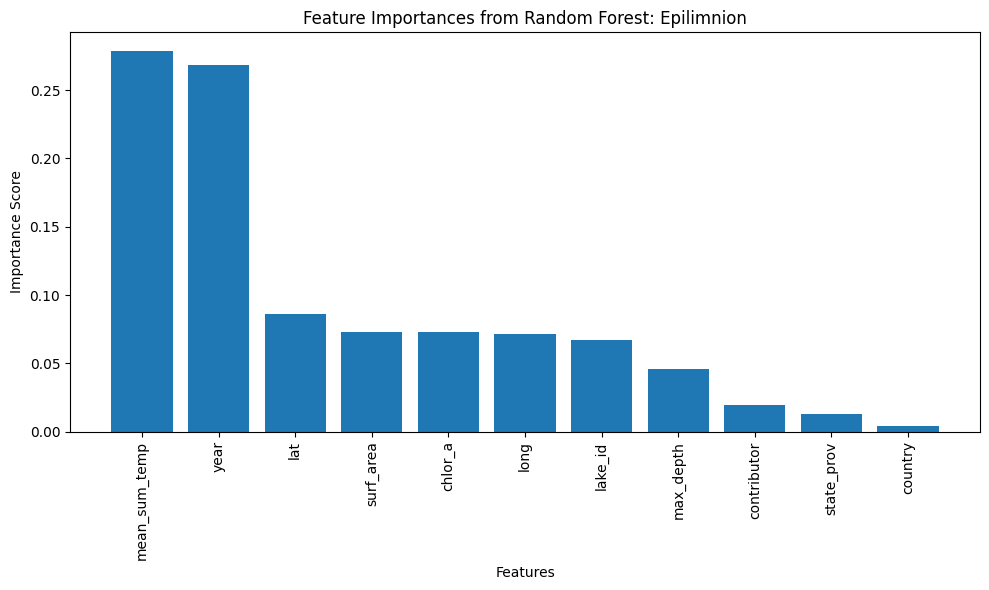

In [ ]:
feature_importances_rf = random_forest_model.feature_importances_
feature_importance_series_rf = pd.Series(feature_importances_rf, index=X_train.columns)
ranked_feature_importances_rf = feature_importance_series_rf.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(ranked_feature_importances_rf.index, ranked_feature_importances_rf.values)
plt.title('Feature Importances from Random Forest: Epilimnion')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This shows us the **mean_Sum_Per_Sat** and the **mean_sum_temp** are the features that help the model make the predictions the most.

In [ ]:

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})

fig = px.scatter(results_df,
                 x = 'Actual',
                 y = 'Predicted',
                 title = 'Actual vs Predicted Values Random Forest: Epilimnion',
                 )

min_val = min(results_df['Actual'].min(), results_df['Predicted'].min())
max_val = max(results_df['Actual'].max(), results_df['Predicted'].max())

fig.add_trace(
    go.Scatter(
        x = [min_val, max_val],
        y = [min_val, max_val],
        mode = 'lines',
        name = 'Prediction Line',
        line = dict(dash ='dash')
    )
)


fig.show()

## 3. Gradient Boost Regressor

In [ ]:
graidentboost_model = GradientBoostingRegressor(random_state=42)

graidentboost_model.fit(X_train, y_train)

y_pred_gb = graidentboost_model.predict(X_test)

rmse_gb = root_mean_squared_error(y_test, y_pred_gb)

print(f"GradientBoost Root Mean Squared Error (RMSE): {rmse_gb}")

GradientBoost Root Mean Squared Error (RMSE): 1.2046272188583038


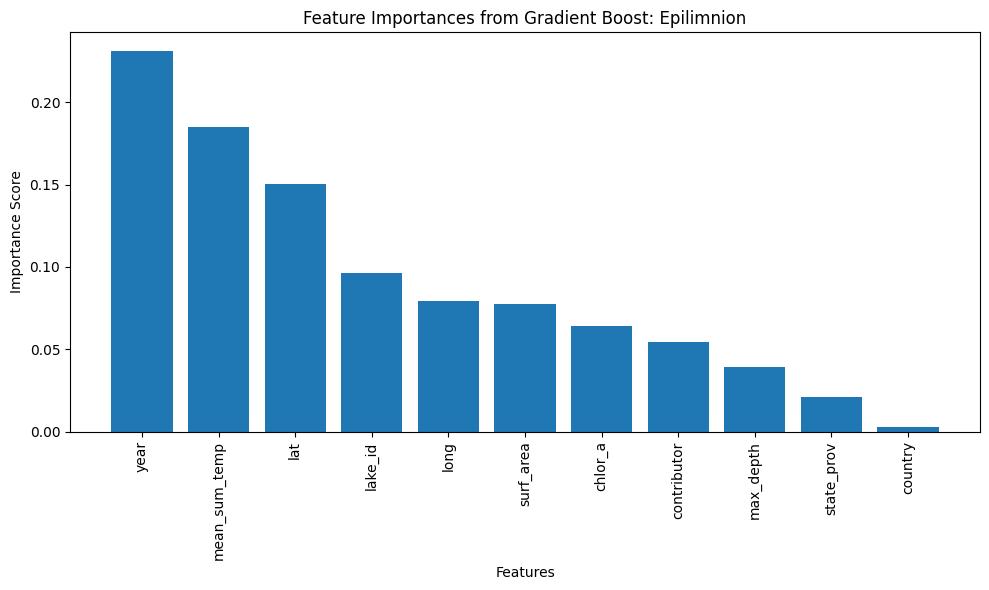

In [ ]:
feature_importances_gb = graidentboost_model.feature_importances_
feature_importance_series_gb = pd.Series(feature_importances_gb, index=X_train.columns)
ranked_feature_importances_gb = feature_importance_series_gb.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(ranked_feature_importances_gb.index, ranked_feature_importances_gb.values)
plt.title('Feature Importances from Gradient Boost: Epilimnion')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gb})

fig = px.scatter(results_df,
                 x = 'Actual',
                 y = 'Predicted',
                 title = 'Actual vs Predicted Values Gradident Boost: Epilimnion',
                 )

min_val = min(results_df['Actual'].min(), results_df['Predicted'].min())
max_val = max(results_df['Actual'].max(), results_df['Predicted'].max())

fig.add_trace(
    go.Scatter(
        x = [min_val, max_val],
        y = [min_val, max_val],
        mode = 'lines',
        name = 'Prediction Line',
        line = dict(dash ='dash')
    )
)


fig.show()

## 4. AdaBoost Regressor

In [ ]:
adaboost_model = AdaBoostRegressor(random_state=42)

adaboost_model.fit(X_train, y_train)

y_pred_ab = adaboost_model.predict(X_test)

rmse_ab = root_mean_squared_error(y_test, y_pred_ab)

print(f"AdaBoost Root Mean Squared Error (RMSE): {rmse_ab}")

AdaBoost Root Mean Squared Error (RMSE): 1.4758682634233506


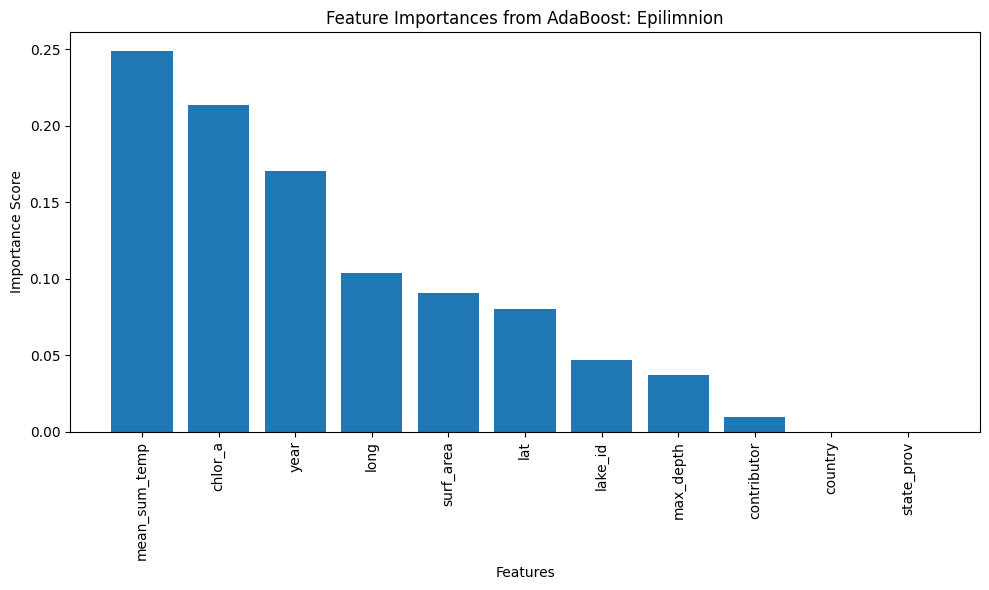

In [ ]:
feature_importances_ab = adaboost_model.feature_importances_
feature_importance_series_ab = pd.Series(feature_importances_ab, index=X_train.columns)
ranked_feature_importances_ab = feature_importance_series_ab.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(ranked_feature_importances_ab.index, ranked_feature_importances_ab.values)
plt.title('Feature Importances from AdaBoost: Epilimnion')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ab})

fig = px.scatter(results_df,
                 x = 'Actual',
                 y = 'Predicted',
                 title = 'Actual vs Predicted Values AdaBoost: Epilimnion',
                 )

min_val = min(results_df['Actual'].min(), results_df['Predicted'].min())
max_val = max(results_df['Actual'].max(), results_df['Predicted'].max())

fig.add_trace(
    go.Scatter(
        x = [min_val, max_val],
        y = [min_val, max_val],
        mode = 'lines',
        name = 'Prediction Line',
        line = dict(dash ='dash')
    )
)


fig.show()

# Hypolimnion (Bottom Levels) Table Creation and Visualizations

## Hypolimnion Statistics Data

In [ ]:
df_hypo = pd.read_csv('Hypolimnion_Derived_Stats.csv')
df_hypo

,RowID,lake_id,name,year,mean_sum_DO,mean_sum_temp,mean_Sum_Per_Sat
0,1,1,Washington,1993,8.12,8.15,68.957
1,2,1,Washington,1994,7.61,9.15,66.207
2,3,1,Washington,1995,8.00,8.56,68.593
3,4,1,Washington,1996,8.05,8.68,69.253
4,5,1,Washington,1997,8.12,8.10,68.953
...,...,...,...,...,...,...,...
6778,6874,442,Nkuruba,2007,0.71,22.30,NaN
6779,6875,442,Nkuruba,2008,0.61,22.13,NaN
6780,6876,442,Nkuruba,2009,0.21,22.23,NaN
6781,6877,442,Nkuruba,2010,0.20,22.16,NaN


In [ ]:
df_hypo.rename(columns = {'name':'lake_name'}, inplace= True)
df_hypo

,RowID,lake_id,lake_name,year,mean_sum_DO,mean_sum_temp,mean_Sum_Per_Sat
0,1,1,Washington,1993,8.12,8.15,68.957
1,2,1,Washington,1994,7.61,9.15,66.207
2,3,1,Washington,1995,8.00,8.56,68.593
3,4,1,Washington,1996,8.05,8.68,69.253
4,5,1,Washington,1997,8.12,8.10,68.953
...,...,...,...,...,...,...,...
6778,6874,442,Nkuruba,2007,0.71,22.30,NaN
6779,6875,442,Nkuruba,2008,0.61,22.13,NaN
6780,6876,442,Nkuruba,2009,0.21,22.23,NaN
6781,6877,442,Nkuruba,2010,0.20,22.16,NaN


## Join Hypolimnion Data with Lakes Data by Lake_ID and lake_name

In [ ]:
df_hypo_lakes = pd.merge(df_hypo, df_lakes, on = ['lake_id', 'lake_name'], how = 'inner')
df_hypo_lakes = df_hypo_lakes.dropna().reset_index(drop=True)
df_hypo_lakes

,RowID,lake_id,lake_name,year,mean_sum_DO,mean_sum_temp,mean_Sum_Per_Sat,contributor,country,state_prov,lat,long,max_depth,surf_area,chlor_a
0,1,1,Washington,1993,8.12,8.15,68.957,28,USA,Washington,47.6215,-122.2558,65.0,8760.0,2.245139
1,2,1,Washington,1994,7.61,9.15,66.207,28,USA,Washington,47.6215,-122.2558,65.0,8760.0,2.245139
2,3,1,Washington,1995,8.00,8.56,68.593,28,USA,Washington,47.6215,-122.2558,65.0,8760.0,2.245139
3,4,1,Washington,1996,8.05,8.68,69.253,28,USA,Washington,47.6215,-122.2558,65.0,8760.0,2.245139
4,5,1,Washington,1997,8.12,8.10,68.953,28,USA,Washington,47.6215,-122.2558,65.0,8760.0,2.245139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,6855,441,Castle,2001,5.99,5.10,58.213,82,US,California,41.2275,-122.3836,34.0,19.0,1.665328
2353,6856,441,Castle,2002,6.06,4.88,58.834,82,US,California,41.2275,-122.3836,34.0,19.0,1.665328
2354,6857,441,Castle,2009,6.03,5.17,58.915,82,US,California,41.2275,-122.3836,34.0,19.0,1.665328
2355,6858,441,Castle,2010,6.29,4.95,61.164,82,US,California,41.2275,-122.3836,34.0,19.0,1.665328


## Preliminary Data Visualizations for Hypolimnion (Bottom Level) Dissolved Oxygen Concentrations

In [ ]:
fig = px.box(df_hypo_lakes, x = 'lake_name', y = 'mean_sum_DO')
fig.show()

In [ ]:
fig = px.histogram(df_hypo_lakes, x = 'lake_name')
fig.show()

In [ ]:
fig = px.scatter_matrix(df_hypo_lakes)
fig.show()

In [ ]:
fig = px.scatter_matrix(df_hypo_lakes[['mean_sum_DO', 'mean_Sum_Per_Sat', 'mean_sum_temp']])
fig.show()

There is **multicollinearity** between **mean_sum_DO** and **mean_Sum_Per_Sat**, both are measures of deoxigentation. One is in units of Miligrams/Liter of dissolved oxygen and the other is percent of saturation for dissolved oxygen. We will use mean DO in mg/Liter so we will drop the mean_sum_Per_Sat column. At this point I will also drop the RowID as it is an unique identifier and not a predictor that we want to assess.

In [ ]:
df_hypo_lakes = df_hypo_lakes.drop(columns = ['mean_Sum_Per_Sat', 'RowID'])
df_hypo_lakes.columns

Index(['lake_id', 'lake_name', 'year', 'mean_sum_DO', 'mean_sum_temp',
       'contributor', 'country', 'state_prov', 'lat', 'long', 'max_depth',
       'surf_area', 'chlor_a'],
      dtype='object')

# Predictions for Hypolimnion (Bottom Levels) Dissolved Oxygen

## 1. Split into test and training sets

We do not need to fix class imbalance since we are using regression to make predictions on mean_sum_DO. But we will need to encode the categorical columns such as country and state/providence and remove the lake names column since it is already encoded into lake IDs.

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['country', 'state_prov']
numerical_df = df_hypo_lakes.drop(columns = ['country', 'state_prov', 'lake_name'])

categorical_cols_encoded = []
for i in categorical_cols:
  le = LabelEncoder()
  categorical_cols_encoded.append(pd.Series(le.fit_transform(df_hypo_lakes[i]), name = i))

cat_encoded = pd.concat(categorical_cols_encoded, axis = 1)
hypo_encoded_df = pd.concat([numerical_df, cat_encoded], axis=1)

hypo_encoded_df


,lake_id,year,mean_sum_DO,mean_sum_temp,contributor,lat,long,max_depth,surf_area,chlor_a,country,state_prov
0,1,1993,8.12,8.15,28,47.6215,-122.2558,65.0,8760.0,2.245139,6,25
1,1,1994,7.61,9.15,28,47.6215,-122.2558,65.0,8760.0,2.245139,6,25
2,1,1995,8.00,8.56,28,47.6215,-122.2558,65.0,8760.0,2.245139,6,25
3,1,1996,8.05,8.68,28,47.6215,-122.2558,65.0,8760.0,2.245139,6,25
4,1,1997,8.12,8.10,28,47.6215,-122.2558,65.0,8760.0,2.245139,6,25
...,...,...,...,...,...,...,...,...,...,...,...,...
2352,441,2001,5.99,5.10,82,41.2275,-122.3836,34.0,19.0,1.665328,5,3
2353,441,2002,6.06,4.88,82,41.2275,-122.3836,34.0,19.0,1.665328,5,3
2354,441,2009,6.03,5.17,82,41.2275,-122.3836,34.0,19.0,1.665328,5,3
2355,441,2010,6.29,4.95,82,41.2275,-122.3836,34.0,19.0,1.665328,5,3


In [ ]:
X = hypo_encoded_df.drop(columns = ['mean_sum_DO'])
y = hypo_encoded_df['mean_sum_DO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1885, 11)
Shape of X_test: (472, 11)
Shape of y_train: (1885,)
Shape of y_test: (472,)


## 2. Random Forest Regressor

In [ ]:
random_forest_model = RandomForestRegressor(random_state = 42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest - Root Mean Squared Error (RMSE):  {rmse_rf}")

Random Forest - Root Mean Squared Error (RMSE):  1.1916250394837193


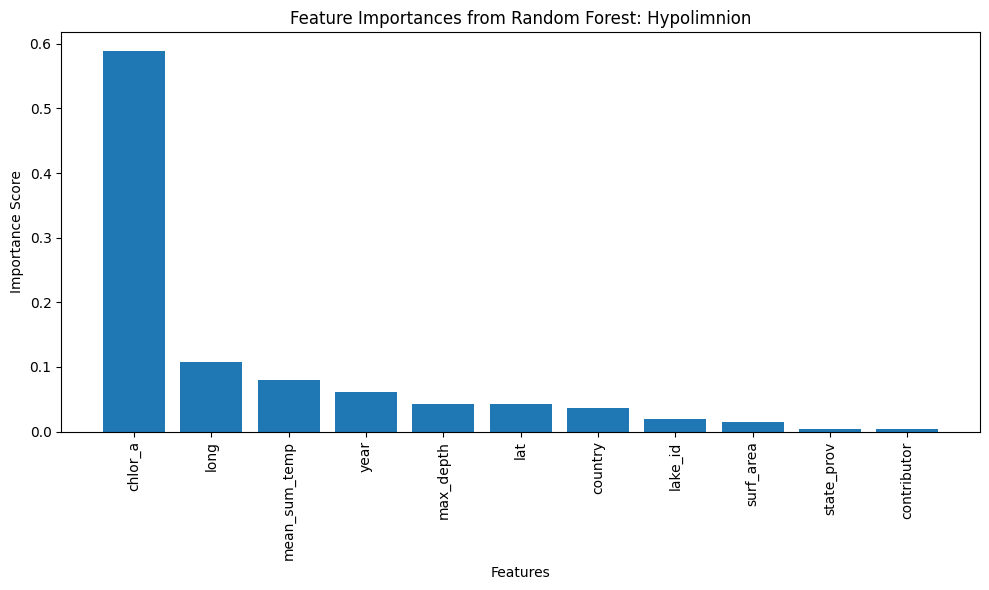

In [ ]:
feature_importances_rf = random_forest_model.feature_importances_
feature_importance_series_rf = pd.Series(feature_importances_rf, index=X_train.columns)
ranked_feature_importances_rf = feature_importance_series_rf.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(ranked_feature_importances_rf.index, ranked_feature_importances_rf.values)
plt.title('Feature Importances from Random Forest: Hypolimnion')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})

fig = px.scatter(results_df,
                 x = 'Actual',
                 y = 'Predicted',
                 title = 'Actual vs Predicted Values Random Forest: Hypolimnion',
                 )

min_val = min(results_df['Actual'].min(), results_df['Predicted'].min())
max_val = max(results_df['Actual'].max(), results_df['Predicted'].max())

fig.add_trace(
    go.Scatter(
        x = [min_val, max_val],
        y = [min_val, max_val],
        mode = 'lines',
        name = 'Prediction Line',
        line = dict(dash ='dash')
    )
)


fig.show()

## 3. Gradient Boost Regressor

In [ ]:
graidentboost_model = GradientBoostingRegressor(random_state=42)

graidentboost_model.fit(X_train, y_train)

y_pred_gb = graidentboost_model.predict(X_test)

rmse_gb = root_mean_squared_error(y_test, y_pred_gb)

print(f"GradientBoost Root Mean Squared Error (RMSE): {rmse_gb}")

GradientBoost Root Mean Squared Error (RMSE): 1.1603541390226093


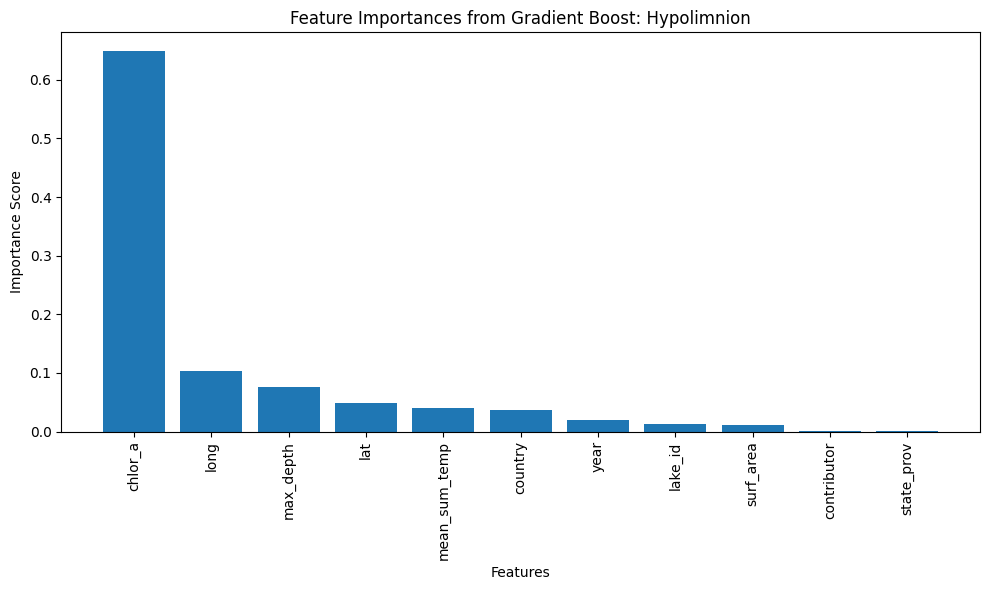

In [ ]:
feature_importances_gb = graidentboost_model.feature_importances_
feature_importance_series_gb = pd.Series(feature_importances_gb, index=X_train.columns)
ranked_feature_importances_gb = feature_importance_series_gb.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(ranked_feature_importances_gb.index, ranked_feature_importances_gb.values)
plt.title('Feature Importances from Gradient Boost: Hypolimnion')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gb})

fig = px.scatter(results_df,
                 x = 'Actual',
                 y = 'Predicted',
                 title = 'Actual vs Predicted Values Gradient Boost: Hypolimnion',
                 )

min_val = min(results_df['Actual'].min(), results_df['Predicted'].min())
max_val = max(results_df['Actual'].max(), results_df['Predicted'].max())

fig.add_trace(
    go.Scatter(
        x = [min_val, max_val],
        y = [min_val, max_val],
        mode = 'lines',
        name = 'Prediction Line',
        line = dict(dash ='dash')
    )
)


fig.show()

## 4. AdaBoost Regressor

In [ ]:
adaboost_model = AdaBoostRegressor(random_state=42)

adaboost_model.fit(X_train, y_train)

y_pred_ab = adaboost_model.predict(X_test)

rmse_ab = root_mean_squared_error(y_test, y_pred_ab)

print(f"AdaBoost Root Mean Squared Error (RMSE): {rmse_ab}")

AdaBoost Root Mean Squared Error (RMSE): 2.0074144064963386


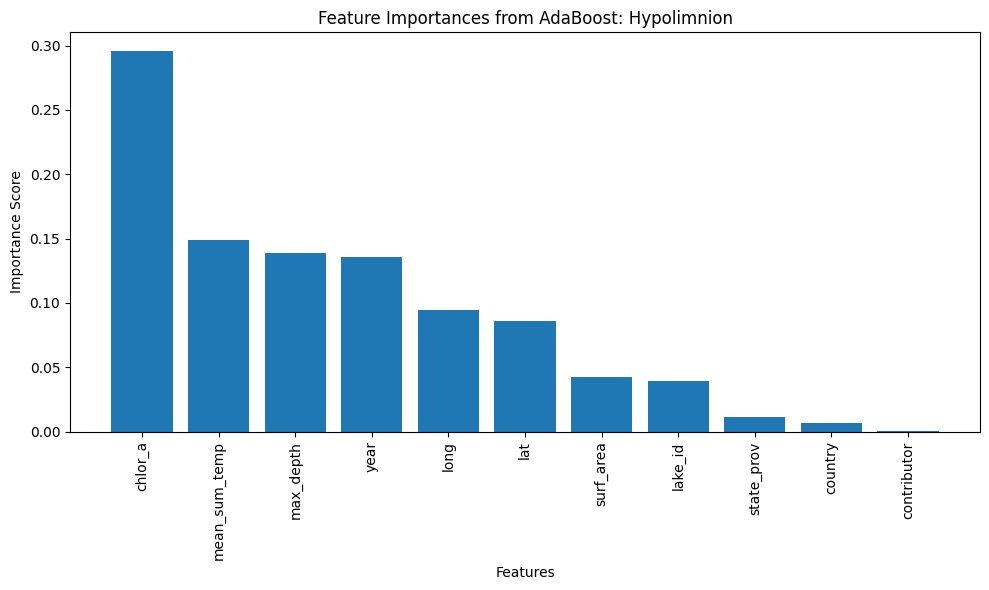

In [ ]:
feature_importances_ab = adaboost_model.feature_importances_
feature_importance_series_ab = pd.Series(feature_importances_ab, index=X_train.columns)
ranked_feature_importances_ab = feature_importance_series_ab.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(ranked_feature_importances_ab.index, ranked_feature_importances_ab.values)
plt.title('Feature Importances from AdaBoost: Hypolimnion')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ab})

fig = px.scatter(results_df,
                 x = 'Actual',
                 y = 'Predicted',
                 title = 'Actual vs Predicted Values AdaBoost: Hypolimnion',
                 )

min_val = min(results_df['Actual'].min(), results_df['Predicted'].min())
max_val = max(results_df['Actual'].max(), results_df['Predicted'].max())

fig.add_trace(
    go.Scatter(
        x = [min_val, max_val],
        y = [min_val, max_val],
        mode = 'lines',
        name = 'Prediction Line',
        line = dict(dash ='dash')
    )
)


fig.show()